In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Dataset**

In [72]:
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/train_data.csv")
test  = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test_data.csv")

In [73]:
train.head()

id  Gender  Umur  ...  Sourcing_Channel  Hari_Diasuransikan Target
0   58609    Pria  65.0  ...              15.0               131.0      0
1  208222  Wanita  22.0  ...               NaN                 NaN      0
2  345428  Wanita  24.0  ...               NaN               181.0      0
3  236831    Pria  58.0  ...             124.0                 NaN      0
4  280181    Pria   NaN  ...               NaN                 NaN      1

[5 rows x 11 columns]

In [74]:
test.head()

id  Gender  Umur  ...    Biaya  Sourcing_Channel Hari_Diasuransikan
0  273737     NaN   NaN  ...      NaN               NaN              193.0
1   49175    Pria  25.0  ...      NaN             152.0              153.0
2  353494  Wanita  50.0  ...  31641.0             124.0              278.0
3  182676  Wanita  59.0  ...   2630.0              26.0              202.0
4  498206  Wanita  57.0  ...  26357.0             122.0              142.0

[5 rows x 10 columns]

In [75]:
print(train.shape)
print(test.shape)

(382154, 11)
(78273, 10)


In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  382154 non-null  int64  
 1   Gender              350386 non-null  object 
 2   Umur                285896 non-null  float64
 3   Izin_Mengemudi      305507 non-null  float64
 4   Kode_Wilayah        298080 non-null  float64
 5   Tanggal_Asuransi    304070 non-null  object 
 6   Tahun_Kendaraan     315714 non-null  object 
 7   Biaya               255617 non-null  float64
 8   Sourcing_Channel    298509 non-null  float64
 9   Hari_Diasuransikan  306488 non-null  float64
 10  Target              382154 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 32.1+ MB


In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78273 entries, 0 to 78272
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  78273 non-null  int64  
 1   Gender              70695 non-null  object 
 2   Umur                62692 non-null  float64
 3   Izin_Mengemudi      62560 non-null  float64
 4   Kode_Wilayah        58720 non-null  float64
 5   Tanggal_Asuransi    67021 non-null  object 
 6   Tahun_Kendaraan     64722 non-null  object 
 7   Biaya               57426 non-null  float64
 8   Sourcing_Channel    65034 non-null  float64
 9   Hari_Diasuransikan  61053 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 6.0+ MB


In [78]:
train.describe()

id           Umur  ...  Hari_Diasuransikan         Target
count  382154.000000  285896.000000  ...       306488.000000  382154.000000
mean   234392.953477      38.916592  ...          154.168995       0.163811
std    139527.487326      16.706800  ...           83.720850       0.370104
min         1.000000      20.000000  ...           10.000000       0.000000
25%    115006.250000      24.000000  ...           81.000000       0.000000
50%    230461.500000      33.000000  ...          154.000000       0.000000
75%    345434.750000      52.000000  ...          227.000000       0.000000
max    508145.000000      85.000000  ...          299.000000       1.000000

[8 rows x 8 columns]

In [79]:
test.describe()

id          Umur  ...  Sourcing_Channel  Hari_Diasuransikan
count   78273.000000  62692.000000  ...      65034.000000        61053.000000
mean   233232.431656     41.207092  ...        108.169696          154.825103
std    138985.576956     16.854298  ...         57.092660           83.467490
min         5.000000     20.000000  ...          1.000000           10.000000
25%    115187.000000     25.000000  ...         26.000000           83.000000
50%    228150.000000     40.000000  ...        151.000000          155.000000
75%    343485.000000     54.000000  ...        152.000000          227.000000
max    508136.000000     85.000000  ...        163.000000          299.000000

[8 rows x 7 columns]

In [80]:
train.isna().sum()

id                         0
Gender                 31768
Umur                   96258
Izin_Mengemudi         76647
Kode_Wilayah           84074
Tanggal_Asuransi       78084
Tahun_Kendaraan        66440
Biaya                 126537
Sourcing_Channel       83645
Hari_Diasuransikan     75666
Target                     0
dtype: int64

In [81]:
test.isna().sum()

id                        0
Gender                 7578
Umur                  15581
Izin_Mengemudi        15713
Kode_Wilayah          19553
Tanggal_Asuransi      11252
Tahun_Kendaraan       13551
Biaya                 20847
Sourcing_Channel      13239
Hari_Diasuransikan    17220
dtype: int64

**EDA(Exploratory Data Analysis)**

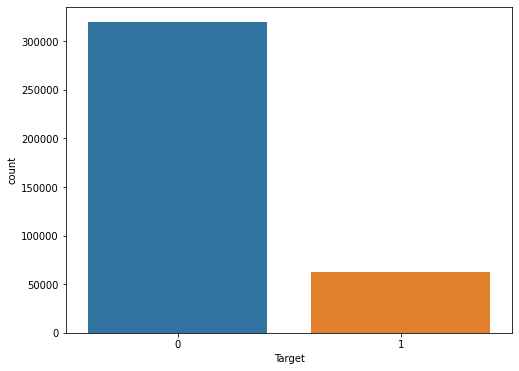

In [82]:
plt.figure(figsize=(8,6))
sns.countplot(x='Target', data= train)
plt.show()

Dapat dilihat bahwa banyak pelanggan tidak tertarik untuk melanjutkan asuransi

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


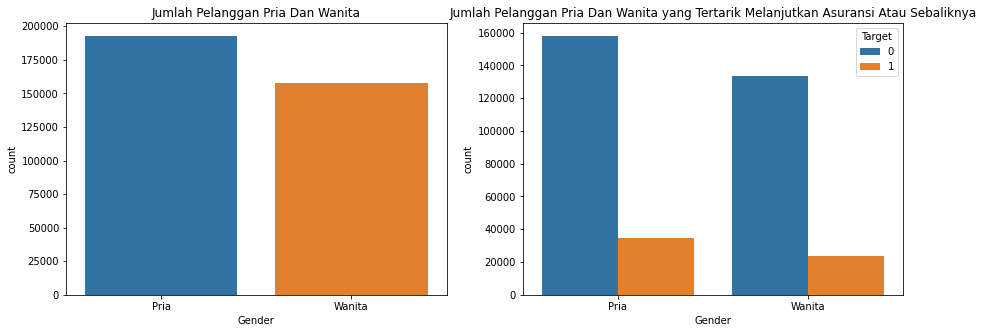

In [83]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(train['Gender'])
plt.title("Jumlah Pelanggan Pria Dan Wanita")
plt.subplot(1,2,2)
sns.countplot(train['Gender'], hue = train['Target'])
plt.title("Jumlah Pelanggan Pria Dan Wanita yang Tertarik Melanjutkan Asuransi Atau Sebaliknya")
plt.show()

Pelanggan pria lebih banyak tertarik untuk melanjutkan asuransi daripada pelanggan wanita. Namun hal tersebut mungkin dikarenakan jumlah pelanggan pria yang lebih banyak dibandingkan pelanggan wanita

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


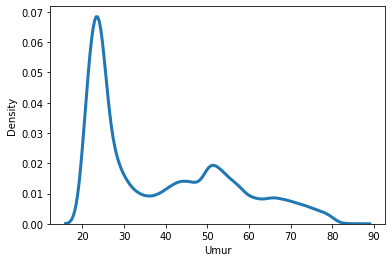

In [84]:
sns.distplot(train['Umur'], hist = False, kde = True, kde_kws = {'linewidth': 3})

In [85]:
def rentang(x):
    if (x>=20) & (x<31):
        return '20-30'
    if(x>=31) & (x<41):
        return '31-40'
    if(x>=41) & (x<51):
        return '41-50'
    if(x>=51) & (x<61):
        return '51-60'
    if(x>=61) & (x<71):
        return '61-70'
    if(x>=71) & (x<81):
        return '71-80'
    if(x>=81) & (x<91):
        return '81-90'

In [88]:
dt_copy = train.copy()

In [89]:
dt_copy['Rentang_Umur']=dt_copy['Umur'].apply(rentang)

In [90]:
dt_copy[['Umur','Rentang_Umur']]

Umur Rentang_Umur
0       65.0        61-70
1       22.0        20-30
2       24.0        20-30
3       58.0        51-60
4        NaN         None
...      ...          ...
382149  52.0        51-60
382150  23.0        20-30
382151   NaN         None
382152  51.0        51-60
382153  57.0        51-60

[382154 rows x 2 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

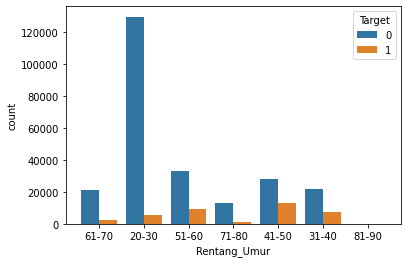

In [91]:
sns.countplot('Rentang_Umur',data=dt_copy,hue='Target')
plt.plot()

* Mayoritas pelanggan berusia antara 20 sampai 30 tahun
* Pelanggan berusia 40 tahun keatas lebih tertarik untuk melanjutkan layanan asuransi


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


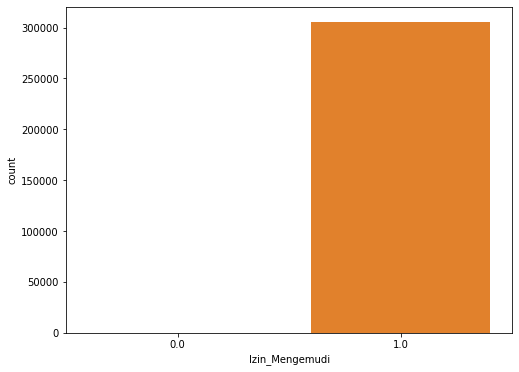

1.0    305145
0.0       362
Name: Izin_Mengemudi, dtype: int64

In [92]:
plt.figure(figsize=(8,6))
sns.countplot(train['Izin_Mengemudi'])
plt.show()

train.Izin_Mengemudi.value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


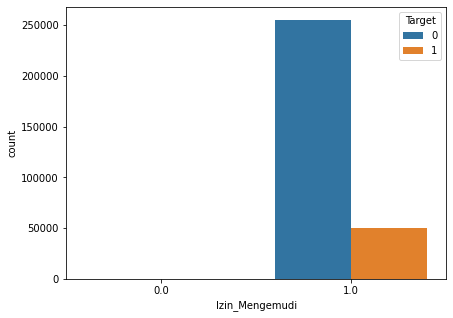

In [93]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,2)
sns.countplot(train['Izin_Mengemudi'], hue = train['Target'])
plt.show()

* Hampir seluruh pelanggan asuransi sudah memiliki izin mengemudi
* Mayoritas pelanggan yang tertarik malnjutkan layanan asuransi sudah memiliki izin mengemudi


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


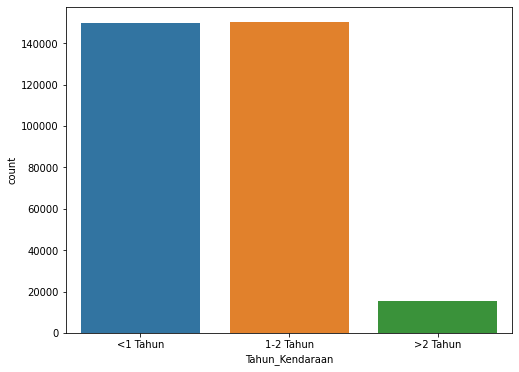

1-2 Tahun    150132
<1 Tahun     149957
>2 Tahun      15625
Name: Tahun_Kendaraan, dtype: int64

In [94]:
plt.figure(figsize=(8,6))
sns.countplot(train['Tahun_Kendaraan'])
plt.show()

train.Tahun_Kendaraan.value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


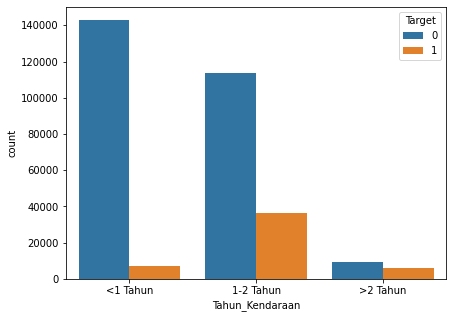

In [95]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,2)
sns.countplot(train['Tahun_Kendaraan'], hue = train['Target'])
plt.show()

* Pelanggan yang memiliki kendaraan diatas 2 tahun lebih sedikit dibandingkan pelanggan yang memilki kendaraan 1-2 dan dibawah 1 tahun
* Pelanggan yang memiliki kendaraan 1-2 tahun lebih tertarik untuk melanjutkan asuransi dibandingkan pelanggan yang memiliki kendaraan dibawah 1 tahun dan diatas 2 tahun


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


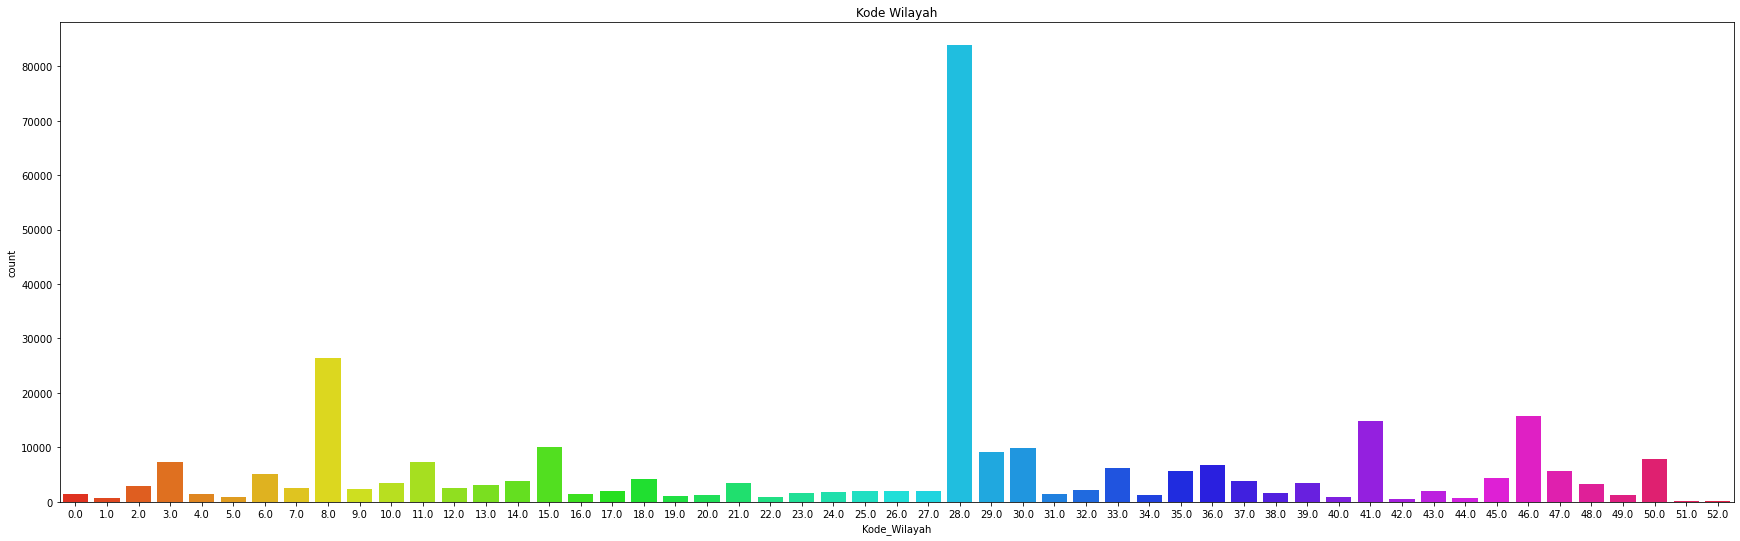

In [96]:
plt.figure(figsize = (30,30))
plt.subplot(3,1,1)
sns.countplot(train['Kode_Wilayah'], palette = 'hsv')
plt.title('Kode Wilayah')
plt.show()

Wilayah dengan kode 28 memiliki jumlah pelanggan paling tinggi dalam memilih layanan asuransi perusahaan J Insurance

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


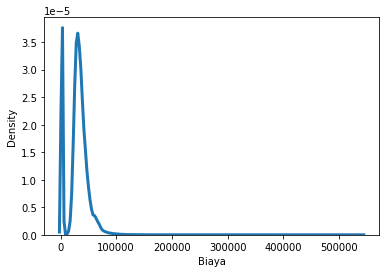

In [97]:
sns.distplot(train['Biaya'], hist = False, kde = True, kde_kws = {'linewidth': 3})

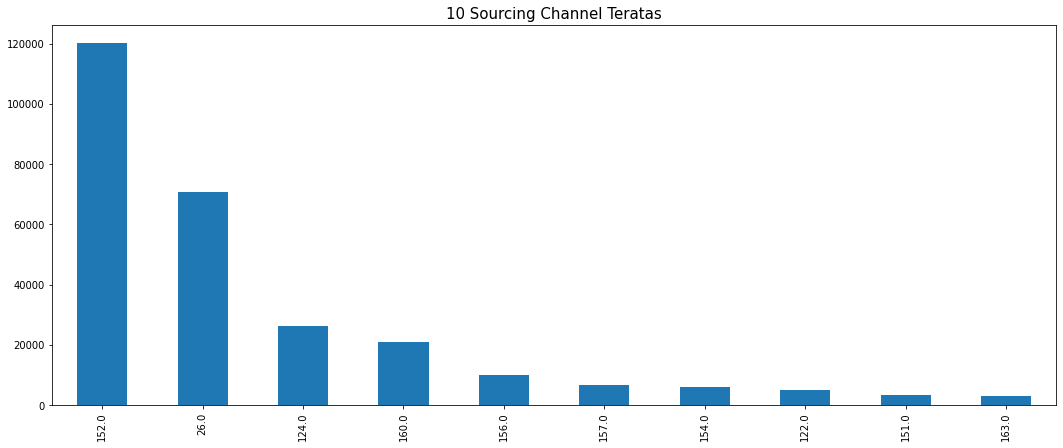

In [98]:
plt.figure(figsize=(18, 7))
train['Sourcing_Channel'].value_counts().head(10).plot.bar()

plt.title('10 Sourcing Channel Teratas', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

**Preprocessing**

In [99]:
train.drop(['id'], axis=1, inplace=True)
train.drop(['Tanggal_Asuransi'], axis=1, inplace=True)
test.drop(['Tanggal_Asuransi'], axis=1, inplace=True)

In [100]:
#Numerical
train['Umur'] = train['Umur'].fillna(train['Umur'].median())
train['Izin_Mengemudi'] = train['Izin_Mengemudi'].fillna(train['Izin_Mengemudi'].median())
train['Kode_Wilayah'] = train['Kode_Wilayah'].fillna(train['Kode_Wilayah'].median())
train['Biaya'] = train['Biaya'].fillna(train['Biaya'].median())
train['Sourcing_Channel'] = train['Sourcing_Channel'].fillna(train['Sourcing_Channel'].median())
train['Hari_Diasuransikan'] = train['Hari_Diasuransikan'].fillna(train['Hari_Diasuransikan'].median())

#Categorical
train['Gender'].fillna(train['Gender'].value_counts().index[0], inplace=True)
train['Tahun_Kendaraan'].fillna(train['Tahun_Kendaraan'].value_counts().index[0], inplace=True)

In [101]:
from sklearn import preprocessing
def label_encoder(data):
    le = preprocessing.LabelEncoder()
    data = le.fit_transform(data)
    return data

In [102]:
train['Gender'] = label_encoder(train['Gender'])
train['Tahun_Kendaraan'] = label_encoder(train['Tahun_Kendaraan'])
train.head()

Gender  Umur  Izin_Mengemudi  ...  Sourcing_Channel  Hari_Diasuransikan  Target
0       0  65.0             1.0  ...              15.0               131.0       0
1       1  22.0             1.0  ...             152.0               154.0       0
2       1  24.0             1.0  ...             152.0               181.0       0
3       0  58.0             1.0  ...             124.0               154.0       0
4       0  33.0             1.0  ...             152.0               154.0       1

[5 rows x 9 columns]

In [103]:
test['Umur'] = test['Umur'].fillna(test['Umur'].median())
test['Izin_Mengemudi'] = test['Izin_Mengemudi'].fillna(test['Izin_Mengemudi'].median())
test['Kode_Wilayah'] = test['Kode_Wilayah'].fillna(test['Kode_Wilayah'].median())
test['Biaya'] = test['Biaya'].fillna(test['Biaya'].median())
test['Sourcing_Channel'] = test['Sourcing_Channel'].fillna(test['Sourcing_Channel'].median())
test['Hari_Diasuransikan'] = test['Hari_Diasuransikan'].fillna(test['Hari_Diasuransikan'].median())

#Categorical
test['Gender'].fillna(test['Gender'].value_counts().index[0], inplace=True)
test['Tahun_Kendaraan'].fillna(test['Tahun_Kendaraan'].value_counts().index[0], inplace=True)

In [104]:
from sklearn import preprocessing
def label_encoder(data):
    le = preprocessing.LabelEncoder()
    data = le.fit_transform(data)
    return data

In [105]:
test['Gender'] = label_encoder(test['Gender'])
test['Tahun_Kendaraan'] = label_encoder(test['Tahun_Kendaraan'])
test.head()

id  Gender  Umur  ...    Biaya  Sourcing_Channel  Hari_Diasuransikan
0  273737       0  40.0  ...  32412.5             151.0               193.0
1   49175       0  25.0  ...  32412.5             152.0               153.0
2  353494       1  50.0  ...  31641.0             124.0               278.0
3  182676       1  59.0  ...   2630.0              26.0               202.0
4  498206       1  57.0  ...  26357.0             122.0               142.0

[5 rows x 9 columns]

**Modeling**

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [107]:
train_target=train["Target"]
train=train.drop(["Target"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(train,train_target,test_size=0.30,random_state=123)

In [108]:
!pip install catboost

In [151]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(learning_rate=0.02, l2_leaf_reg=1, iterations= 500, depth= 9, verbose=200)

In [152]:
cat= cat.fit(X_train, y_train)

0:	learn: 0.6766150	total: 130ms	remaining: 1m 4s
200:	learn: 0.3672391	total: 24.6s	remaining: 36.6s
400:	learn: 0.3625009	total: 48.3s	remaining: 11.9s
499:	learn: 0.3609830	total: 1m	remaining: 0us


In [153]:
cat_pred=cat.predict(X_test)
print(classification_report(y_test,cat_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     95849
           1       0.57      0.06      0.11     18798

    accuracy                           0.84    114647
   macro avg       0.71      0.53      0.51    114647
weighted avg       0.80      0.84      0.78    114647



In [154]:
test_df=test.drop(['id'],axis=1)
test

id  Gender  Umur  ...    Biaya  Sourcing_Channel  Hari_Diasuransikan
0      273737       0  40.0  ...  32412.5             151.0               193.0
1       49175       0  25.0  ...  32412.5             152.0               153.0
2      353494       1  50.0  ...  31641.0             124.0               278.0
3      182676       1  59.0  ...   2630.0              26.0               202.0
4      498206       1  57.0  ...  26357.0             122.0               142.0
...       ...     ...   ...  ...      ...               ...                 ...
78268  456819       0  40.0  ...  27796.0              26.0               155.0
78269  202443       0  34.0  ...   2630.0              26.0               141.0
78270  368881       0  37.0  ...  41363.0              26.0               155.0
78271  145064       0  24.0  ...  42223.0             152.0               155.0
78272  129190       0  77.0  ...  32412.5              26.0               135.0

[78273 rows x 9 columns]

In [155]:
cat_pred_test=cat.predict(test_df)
submission=pd.DataFrame(data={'id':test['id'],'Target':cat_pred_test})
submission

id  Target
0      273737       0
1       49175       0
2      353494       0
3      182676       0
4      498206       0
...       ...     ...
78268  456819       0
78269  202443       0
78270  368881       0
78271  145064       0
78272  129190       0

[78273 rows x 2 columns]

In [156]:
submission["Target"].value_counts()

0    77095
1     1178
Name: Target, dtype: int64

In [157]:
accu = accuracy_score(y_test,cat_pred)
print(accu)

0.8385653353336764


In [158]:
submission.to_csv("Submission_fokus_makalah_aja.csv",index=False)
submission

id  Target
0      273737       0
1       49175       0
2      353494       0
3      182676       0
4      498206       0
...       ...     ...
78268  456819       0
78269  202443       0
78270  368881       0
78271  145064       0
78272  129190       0

[78273 rows x 2 columns]